# **Task HD1** 
## Analyzing YouTube Video Data from News Publishers

##### This task focuses on analyzing YouTube videos about a news topic (e.g., Covid-19) published by at least 4 English news publishers (e.g., BBC, Fox News, ...) from a start date to an end date. You will need to specify the news topic and the list of keywords to search for the videos about that topic on YouTube. Also, you will need to extract the channel IDs of the news publishers using the function get_channel_info() given to you in the attached "collect.ipynb" file. All settings need to be specified in Section B (Settings) of "collect.ipynb" and also copied into Section B (Settings) of this jupyter notebook (HD1.ipynb). Please note the terms "News Publisher" and "Cahnnel" have been used interchangably in this task (each news publisher has a channel - if a news publisher has more than one channels on YouTube, pick any and state that in your TaskCompletionReport). The following instructions convey important information about the task. Please **read them carefully** and complete the task. If you need any clarification please    
<img src="youtube.png" alt="SIT112 Avocado!" width="1800" height="200">

### A. Instructions

#### Attachments
* directions.pdf
* collect.ipynb
* credentials-sample.ini
* video-presentation-guideline.pdf

#### Get Started 
0. Please watch [this video](https://www.youtube.com/watch?v=N9CT6Ggh0oE) about Sentiment Analysis.
1. Rename the "credentials-sample.ini" file to "credentials.ini" and follow the instructions. 
2. Creat your YouTube API key and assign it to developer_key in the credentials.ini file. You will need the YouTube API key to get access to the YouTube API (collect the data). See the following video: https://youtu.be/N18czV5tj5o (the video is not up to date; the instrucitons might be sighly different. You can view the following link for more details: https://developers.google.com/youtube/v3/getting-started). Please note Projects that enable the YouTube Data API have a default quota allocation of 10,000 units per day; to make an efficient use of your quota, please avoid multiple excecutions of the "collect.ipynb" file: https://developers.google.com/youtube/v3/guides/quota_and_compliance_audits. 
3. To work with the YouTube API (send queries), you need to install Google API Python Client using: "conda install google-api-python-client" 
#### Specify the news topic and news publishers (channels)
4. Choose a news topic (e.g., Covid-19) and a list of keywords to be used for finding videos about that topic. You can extract the keywords by looking at some sample video titles. 
5. Choose at least 4 popular English news publishers (e.g., BBC, Fox News).
6. Extract, manually, the video IDs of sample videos from different news publishers (channels). You can do so by clicking on the share button for each video. 
7. Extract the Channel IDs of the videos using the get_channel_info() function in collect.ipynb 
#### Collect the Videos and Comments using "collect.ipynb" 
8. Specify the Channel IDs and names in the Settings section of the attached collect.ipynb file (CHANNELS = {...})
9. Specify the list keywords in the Settings section of the attached collect.ipynb file (KEYWORDS = [...])
10. Specify the START_DATE and END_DATE in the Settings section of the attached collect.ipynb file
11. Specify the MAX_VIDEOS such that you can extract **at least 20 videos per news publisher (channel)**. Make sure for your specified topic, **at least 300 comments per news publisher (channel)** can be collected. Please note some publishers might have disabled comments.
12. Please **do not make any changes to the "collect.ipynb" file**
13. Execute the collect.ipynb file to collect the videos (will be stored in videos.csv) and the comments on those videos (will be stored in comments.csv).
#### Complete the Task
14. <font color='red'> Choose only 1 question from Section E</font>, and answer it based on the hints. Please note, for each question, you must **briefly discuss your observations** based on the results.
15. Please note **there is no unique solution** for most questions; if you need to make any assumptions, **state your assumptions** in the comments and in your TaskCompletionReport and answer the question accordingly. Please also note, **if something has not been clearly stated in a question (e.g., the type of visualization, etc) it means you are allowed to make your own choice**. 
16. **Read the attached "video-presentation-guideline.pdf"** carefully and record a video clip (based on video-presentation-guideline.pdf) that presents your completed task. Upload the video on a video repository such as YouTube (or any other preferred repository) and provide the link in the TaskCompletionReport. 
17. Complete the TaskCompletionReport form.

#### Submit the Task
18. Please make sure you have copied the settings from collect.ipynb into your solution file (HD1.ipynb), under section B (settings).  
19. Please make sure you have executed and saved all the cells in your jupyter notebook without any error; otherwise, your submission may not be flagged as complete. 
20. Please make sure you have included the link to the video rcording of your presentation in your TaskCompletionReport. 
21. Submit (1) the TaskCompletionReport as a "PDF" file and (2) your solution file (HD1.ipynb) as an "ipynb" file (do not zip/combine them). Please do not include "collect.ipynb" in your submission. 

#### <font color ='red'>Attend the Interview </font>
22. Please attend your interview - on week 11 - during the workshop you are enrolled in. 
23. Please make sure you have submitted your task via OnTrack before the interview; you can still resubmit by the end of Week 12 if any changes are needed. 
24. During the interview, you will be asked questions about your submission and might be directed to make changes to your code and explain their impacts on the results/observations. 

Good luck :)

### B. Settings
Copy your settings from Section B of the "collect.ipynb" file below (as Python comments).

In [30]:
# VIDEOS_FILE = "videos.csv"
# COMMENTS_FILE = "comments.csv"
# CREDENTIALS_FILE = 'credentials.ini'
# START_DATE = datetime(2020, 1, 1)
# END_DATE = datetime(2023, 1, 1)
# KEYWORDS =['coronavirus', 'covid', 'covid-19', 'pandemic']
# # You can use functin get_channel_info() to extract the channel ID of a sample video from a news publisher ...
# CHANNELS = {
#     'UCXIJgqnII2ZOINSWNOGFThA' : 'Fox News',
#     'UC16niRr50-MSBwiO3YDb3RA' : 'BBC News',
#     'UCupvZG-5ko_eiXAupbDfxWw' : 'CNN',
#     'UCaXkIU1QidjPwiAYu6GcHjg' : 'MSNBC'
# }
# MAX_VIDEOS = 50 # the maximum number of video that should be returned for each request. Acceptable values are 0 to 50
# QUERY= f"intitle:{','.join(KEYWORDS)}"

### C. Imports
You need to import the following libraries. Install the libraries using "conda install ... or pip install ..." if they have not been installed on your machine. For example you can install google api python client by executing "conda install google-api-python-client"

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError
from datetime import datetime
import os
from configparser import ConfigParser
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
#from wordcloud import WordCloud
from langdetect import detect
import langdetect
from textblob import TextBlob
import calendar
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from prettytable import PrettyTable
from tabulate import tabulate
import numpy as np
from collections import defaultdict
import warnings
from nltk.stem import WordNetLemmatizer
# Ignore the warning
warnings.filterwarnings('ignore')

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1028)>


### D. Clean and Prepare the Data

##### D.1. Write Python code that cleans the data for analyzing the videos and comments.

In [32]:
commentsdf = pd.read_csv('comments.csv')

commentsdf.head()


,video_id,comment_id,comment_text,comment_author,comment_date,comment_like_count,parent_comment_id
0,d1eEWihvwpQ,UgzZ6fvV9JGsvh0159p4AaABAg,hello 5 years later,@Bobherry,2025-03-10T23:40:26Z,0,NaN
1,d1eEWihvwpQ,UgxmZNK1ZIj5jMBUemZ4AaABAg,Permanently messed up my sense of time,@radioactivebeverage,2024-03-15T01:47:38Z,2,NaN
2,d1eEWihvwpQ,UgxbTG_0cWGvMAee0sx4AaABAg,I had COVID-19 in August and it was Super Unpl...,@rosieasmrwhispererzephier7021,2022-10-11T02:46:38Z,0,NaN
3,d1eEWihvwpQ,UgxbTG_0cWGvMAee0sx4AaABAg.9h1A5EF38D69wxn0x1JQlS,@@showline8303much better I also had Influenza...,@rosieasmrwhispererzephier7021,2023-11-11T02:21:41Z,0,UgxbTG_0cWGvMAee0sx4AaABAg
4,d1eEWihvwpQ,UgzBGHRwVHq4rkAa4AZ4AaABAg,"This happened on March 26, 2020. That is when...",@danhobson24,2022-06-08T21:53:44Z,0,NaN


In [33]:
videosdf = pd.read_csv('videos.csv')

videosdf.head()

,video_id,channel_id,video_title,channel_title,category_name,live_upcoming_none,view_count,like_count,dislike_count,comment_count,published_at,tags,duration,definition,caption,thumbnail,url
0,d1eEWihvwpQ,UCXIJgqnII2ZOINSWNOGFThA,who declares coronavirus outbreak a pandemic,Fox News,News & Politics,none,457860,3617,0,1901,2020-03-11T16:50:56Z,"fox news alert,breaking news,fox,news,fox news...",PT51S,hd,True,https://i.ytimg.com/vi/d1eEWihvwpQ/default.jpg,https://www.youtube.com/watch?v=d1eEWihvwpQ
1,0pkwjVhq230,UCXIJgqnII2ZOINSWNOGFThA,coronavirus pandemic questions answered part,Fox News,News & Politics,none,45006,415,0,124,2020-03-16T18:18:47Z,"Fox News Channel,Fox News,News,FNC,harris faul...",PT4M11S,hd,True,https://i.ytimg.com/vi/0pkwjVhq230/default.jpg,https://www.youtube.com/watch?v=0pkwjVhq230
2,zwX5z_BvaN4,UCXIJgqnII2ZOINSWNOGFThA,coronavirus pandemic questions answered part,Fox News,News & Politics,none,43193,634,0,179,2020-03-16T18:12:18Z,"Fox News Channel,Fox News,News,FNC,outnumbered...",PT7M33S,hd,True,https://i.ytimg.com/vi/zwX5z_BvaN4/default.jpg,https://www.youtube.com/watch?v=zwX5z_BvaN4
3,6G_-qe0iMBs,UCXIJgqnII2ZOINSWNOGFThA,coronavirus pandemic questions answered part,Fox News,News & Politics,none,41458,397,0,170,2020-03-16T18:24:00Z,"Fox News Channel,Fox News,News,FNC,harris faul...",PT4M21S,hd,True,https://i.ytimg.com/vi/6G_-qe0iMBs/default.jpg,https://www.youtube.com/watch?v=6G_-qe0iMBs
4,xhpqX1NbusQ,UCXIJgqnII2ZOINSWNOGFThA,coronavirus pandemic questions answered part,Fox News,News & Politics,none,39517,498,0,282,2020-03-16T18:25:52Z,"Fox News Channel,Fox News,News,FNC,harris faul...",PT5M50S,hd,True,https://i.ytimg.com/vi/xhpqX1NbusQ/default.jpg,https://www.youtube.com/watch?v=xhpqX1NbusQ


In [34]:
commentsdf.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4378 entries, 0 to 4377
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   video_id            4378 non-null   object
 1   comment_id          4378 non-null   object
 2   comment_text        4378 non-null   object
 3   comment_author      4373 non-null   object
 4   comment_date        4378 non-null   object
 5   comment_like_count  4378 non-null   int64 
 6   parent_comment_id   501 non-null    object
dtypes: int64(1), object(6)
memory usage: 239.6+ KB


In [35]:
videosdf.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   video_id            200 non-null    object
 1   channel_id          200 non-null    object
 2   video_title         200 non-null    object
 3   channel_title       200 non-null    object
 4   category_name       200 non-null    object
 5   live_upcoming_none  200 non-null    object
 6   view_count          200 non-null    int64 
 7   like_count          200 non-null    int64 
 8   dislike_count       200 non-null    int64 
 9   comment_count       200 non-null    int64 
 10  published_at        200 non-null    object
 11  tags                200 non-null    object
 12  duration            200 non-null    object
 13  definition          200 non-null    object
 14  caption             200 non-null    bool  
 15  thumbnail           200 non-null    object
 16  url                 200 no

In [36]:
print(commentsdf.columns)


Index(['video_id', 'comment_id', 'comment_text', 'comment_author',
       'comment_date', 'comment_like_count', 'parent_comment_id'],
      dtype='object')


In [37]:
print(videosdf.columns)


Index(['video_id', 'channel_id', 'video_title', 'channel_title',
       'category_name', 'live_upcoming_none', 'view_count', 'like_count',
       'dislike_count', 'comment_count', 'published_at', 'tags', 'duration',
       'definition', 'caption', 'thumbnail', 'url'],
      dtype='object')


In [38]:
# a basic data cleaning has been performed on the collected data by the clean_data()function in collect.ipynb
# additionl data cleaning can be added here - if needed  

##### D.2. Write Python code that prepares the data for analyzing the videos and comments.

In [39]:
# A sample code for data preparation has been given below. Feel free to edit when needed

# Load the videos and comments dataframes from their respective CSV files
videos_df = pd.read_csv('videos.csv')
comments_df = pd.read_csv('comments.csv')

# Convert the published_at column to a datetime object for videos_df
videos_df['published_at'] = pd.to_datetime(videos_df['published_at'], format='%Y-%m-%dT%H:%M:%SZ')

# Create a new column that contains the published_at weekly
videos_df['published_at_week'] = videos_df['published_at'].dt.strftime('%Y-%m-%W')

# Create a new column that contains the published_at monthly
videos_df['published_at_month'] = videos_df['published_at'].dt.strftime('%Y-%m')

# Create a new column that contains the published_at monthly
videos_df['published_at_year'] = videos_df['published_at'].dt.strftime('%Y')

# Convert the published_at column to a datetime object for comments_df
comments_df['comment_date'] = pd.to_datetime(comments_df['comment_date'], format='%Y-%m-%dT%H:%M:%SZ')

# Create a new column that contains the published_at weekly
comments_df['comment_date_week'] = comments_df['comment_date'].dt.strftime('%Y-%m-%W')

# Create a new column that contains the published_at monthly
comments_df['comment_date_month'] = comments_df['comment_date'].dt.strftime('%Y-%m')

# Create a new column that contains the published_at monthly
comments_df['comment_date_year'] = comments_df['comment_date'].dt.strftime('%Y')

# Convert the duration column to seconds for videos_df
videos_df['duration'] = videos_df['duration'].apply(lambda x: re.findall(r'PT(\d+)M(\d+)S', x))
videos_df['duration'] = videos_df['duration'].apply(lambda x: int(x[0][0]) * 60 + int(x[0][1]) if len(x) > 0 else 0)

# Prepared DataFrame objects; can be used for data analysis
videos = videos_df
comments = comments_df
videos_comments = pd.merge(videos,comments, on='video_id', how = 'inner') # merged videos and comments

##### D.3. Write Python code that takes a text input and returns its sentiment (polarity) score and sentiment category (positive, negative, neutral)

In [40]:
# This function takes a text input and returns its sentiment (polarity) score
# If the text is null, it returns 0
def get_sentiment_score(text):
    if pd.isnull(text):
        return 0
    else:
        return TextBlob(text).sentiment.polarity
    
# This function takes a text input and returns its sentiment category
# If the text is null, it returns 'neutral'
# If the polarity score is greater than 0, it returns 'positive'
# If the polarity score is less than 0, it returns 'negative'
# Otherwise, it returns 'neutral'
def get_sentiment(text):
    if pd.isnull(text):
        return 'neutral'
    else:
        blob = TextBlob(text)
        if blob.sentiment.polarity > 0:
            return 'positive'
        elif blob.sentiment.polarity < 0:
            return 'negative'
        else:
            return 'neutral'

### E. Analyze the Videos and Comments
* Please make sure you have watched [this video](https://www.youtube.com/watch?v=N9CT6Ggh0oE) and understood the concept of Sentiment Analysis.
* Choose <font color ='red'>(only) 1 </font> of the following questions and write Python code to answer it. 
* Please note you must (briefly) discuss your observations. 
* Use function get_sentiment_score() to identify the sentiment (polarity) score of the video titles or comments.
* Use function get_sentiment() to identify the sentiment categories (positive, negative, neutral) of the video titles or comments.
* Please note the comments are provided to partially guide you; you are not required to strictly follow them. 


##### E.1. What is the monthly distribution of the positive, negative, and neutral sentiments in the video titles and comments from Jan 2020 to Jan 2021? Use visualization to answer this question for different news publishers (channels) and discuss your observations. 

In [41]:
#Merge the commentsdf and the videosdf
#We do this so we can see the publisher i.e. Fox News and their comments.
mergeddf = commentsdf.merge(videosdf[['video_id', 'channel_title']], on='video_id', how='inner')
#Print the new merged df to make sure that this has gone through. 
mergeddf.head()

,video_id,comment_id,comment_text,comment_author,comment_date,comment_like_count,parent_comment_id,channel_title
0,d1eEWihvwpQ,UgzZ6fvV9JGsvh0159p4AaABAg,hello 5 years later,@Bobherry,2025-03-10T23:40:26Z,0,NaN,Fox News
1,d1eEWihvwpQ,UgxmZNK1ZIj5jMBUemZ4AaABAg,Permanently messed up my sense of time,@radioactivebeverage,2024-03-15T01:47:38Z,2,NaN,Fox News
2,d1eEWihvwpQ,UgxbTG_0cWGvMAee0sx4AaABAg,I had COVID-19 in August and it was Super Unpl...,@rosieasmrwhispererzephier7021,2022-10-11T02:46:38Z,0,NaN,Fox News
3,d1eEWihvwpQ,UgxbTG_0cWGvMAee0sx4AaABAg.9h1A5EF38D69wxn0x1JQlS,@@showline8303much better I also had Influenza...,@rosieasmrwhispererzephier7021,2023-11-11T02:21:41Z,0,UgxbTG_0cWGvMAee0sx4AaABAg,Fox News
4,d1eEWihvwpQ,UgzBGHRwVHq4rkAa4AZ4AaABAg,"This happened on March 26, 2020. That is when...",@danhobson24,2022-06-08T21:53:44Z,0,NaN,Fox News


In [42]:
#Drop the useless comments. We dont need to know they author, or the like count. Just its sentiment score and sentiment.
#I left the comment_id in as we may need it, however if not, we can just drop it later.
mergeddf = mergeddf.drop(columns= ['comment_author', 'parent_comment_id', 'comment_like_count'])
#Print the updated df to make sure that our columns have been dropped properly.
mergeddf.head()

,video_id,comment_id,comment_text,comment_date,channel_title
0,d1eEWihvwpQ,UgzZ6fvV9JGsvh0159p4AaABAg,hello 5 years later,2025-03-10T23:40:26Z,Fox News
1,d1eEWihvwpQ,UgxmZNK1ZIj5jMBUemZ4AaABAg,Permanently messed up my sense of time,2024-03-15T01:47:38Z,Fox News
2,d1eEWihvwpQ,UgxbTG_0cWGvMAee0sx4AaABAg,I had COVID-19 in August and it was Super Unpl...,2022-10-11T02:46:38Z,Fox News
3,d1eEWihvwpQ,UgxbTG_0cWGvMAee0sx4AaABAg.9h1A5EF38D69wxn0x1JQlS,@@showline8303much better I also had Influenza...,2023-11-11T02:21:41Z,Fox News
4,d1eEWihvwpQ,UgzBGHRwVHq4rkAa4AZ4AaABAg,"This happened on March 26, 2020. That is when...",2022-06-08T21:53:44Z,Fox News


In [43]:
#Turn the comment_data to a date time object so we can use it to filter later.
mergeddf['comment_date'] = pd.to_datetime(mergeddf['comment_date'])
#Create a new column called month which will be in the form YYYY-MM.
#This will be useful when filering as we dont have to do any slicing [x:x]
mergeddf['month'] = mergeddf['comment_date'].dt.to_period('M')
#Now print our new df to make sure that the month column was created properly
mergeddf.head()



,video_id,comment_id,comment_text,comment_date,channel_title,month
0,d1eEWihvwpQ,UgzZ6fvV9JGsvh0159p4AaABAg,hello 5 years later,2025-03-10 23:40:26+00:00,Fox News,2025-03
1,d1eEWihvwpQ,UgxmZNK1ZIj5jMBUemZ4AaABAg,Permanently messed up my sense of time,2024-03-15 01:47:38+00:00,Fox News,2024-03
2,d1eEWihvwpQ,UgxbTG_0cWGvMAee0sx4AaABAg,I had COVID-19 in August and it was Super Unpl...,2022-10-11 02:46:38+00:00,Fox News,2022-10
3,d1eEWihvwpQ,UgxbTG_0cWGvMAee0sx4AaABAg.9h1A5EF38D69wxn0x1JQlS,@@showline8303much better I also had Influenza...,2023-11-11 02:21:41+00:00,Fox News,2023-11
4,d1eEWihvwpQ,UgzBGHRwVHq4rkAa4AZ4AaABAg,"This happened on March 26, 2020. That is when...",2022-06-08 21:53:44+00:00,Fox News,2022-06


In [44]:
#Create two new columns where we will store the deciman sentiment score and the negative/positive/neutral sentiment
#Set them to None as we dont want to fill them yet. 
mergeddf['sentiment_score'] = None
mergeddf['sentiment'] = None

#You could fill them straight away with the sentiment functions, however, I like to set up my df before computing anything.

#Print the df to make sure that our new colums have been created.
mergeddf.head()

,video_id,comment_id,comment_text,comment_date,channel_title,month,sentiment_score,sentiment
0,d1eEWihvwpQ,UgzZ6fvV9JGsvh0159p4AaABAg,hello 5 years later,2025-03-10 23:40:26+00:00,Fox News,2025-03,None,None
1,d1eEWihvwpQ,UgxmZNK1ZIj5jMBUemZ4AaABAg,Permanently messed up my sense of time,2024-03-15 01:47:38+00:00,Fox News,2024-03,None,None
2,d1eEWihvwpQ,UgxbTG_0cWGvMAee0sx4AaABAg,I had COVID-19 in August and it was Super Unpl...,2022-10-11 02:46:38+00:00,Fox News,2022-10,None,None
3,d1eEWihvwpQ,UgxbTG_0cWGvMAee0sx4AaABAg.9h1A5EF38D69wxn0x1JQlS,@@showline8303much better I also had Influenza...,2023-11-11 02:21:41+00:00,Fox News,2023-11,None,None
4,d1eEWihvwpQ,UgzBGHRwVHq4rkAa4AZ4AaABAg,"This happened on March 26, 2020. That is when...",2022-06-08 21:53:44+00:00,Fox News,2022-06,None,None


In [45]:
# Apply the sentiment score function to get the sentiment score
mergeddf['sentiment_score'] = mergeddf['comment_text'].apply(get_sentiment_score)

# Apply the sentiment function to get the sentiment category (positive/negative/neutral)
mergeddf['sentiment'] = mergeddf['comment_text'].apply(get_sentiment)

#Print the df to make sure we have our scores and sentiments.
mergeddf.head()

,video_id,comment_id,comment_text,comment_date,channel_title,month,sentiment_score,sentiment
0,d1eEWihvwpQ,UgzZ6fvV9JGsvh0159p4AaABAg,hello 5 years later,2025-03-10 23:40:26+00:00,Fox News,2025-03,0.000000,neutral
1,d1eEWihvwpQ,UgxmZNK1ZIj5jMBUemZ4AaABAg,Permanently messed up my sense of time,2024-03-15 01:47:38+00:00,Fox News,2024-03,0.000000,neutral
2,d1eEWihvwpQ,UgxbTG_0cWGvMAee0sx4AaABAg,I had COVID-19 in August and it was Super Unpl...,2022-10-11 02:46:38+00:00,Fox News,2022-10,-0.178571,negative
3,d1eEWihvwpQ,UgxbTG_0cWGvMAee0sx4AaABAg.9h1A5EF38D69wxn0x1JQlS,@@showline8303much better I also had Influenza...,2023-11-11 02:21:41+00:00,Fox News,2023-11,0.081944,positive
4,d1eEWihvwpQ,UgzBGHRwVHq4rkAa4AZ4AaABAg,"This happened on March 26, 2020. That is when...",2022-06-08 21:53:44+00:00,Fox News,2022-06,0.000000,neutral


In [55]:
# Filter the rows where the comment_data is between Jan 2020 and Jan 2021
start_date = '2019-01-01'
end_date = '2021-01-01'

#! Probelm here
filtereddf = mergeddf[(mergeddf['comment_date'] >= start_date) & (mergeddf['comment_date'] <= end_date)]

#The reason we dont use .query for this is becuase its a date time object. If we were to use the query function, we would need to first convert in back to 
#a tring which is a wast of time.

#filtereddf | We had bad index numbers (started at 7)

#Reset the index and drop the old one so we start back at index one.
filtereddf = filtereddf.reset_index(drop = True)

filtereddf.head()


,video_id,comment_id,comment_text,comment_date,channel_title,month,sentiment_score,sentiment
0,d1eEWihvwpQ,UgyNQj-9Y4fq6TXadaJ4AaABAg,"Why is fox news repeatedly reporting on ""new c...",2020-07-04 22:14:22+00:00,Fox News,2020-07,-0.042637,negative
1,d1eEWihvwpQ,UgyvO3i6UgtuSiMj8VF4AaABAg,You spread the news🦋💕🧚🏻now ✨stop✨,2020-06-25 02:01:25+00:00,Fox News,2020-06,0.000000,neutral
2,d1eEWihvwpQ,UgzsnLxvGIf4zKr2HUN4AaABAg,Trump is killing the USA!,2020-05-23 08:01:17+00:00,Fox News,2020-05,0.000000,neutral
3,d1eEWihvwpQ,UgzQBI8UHWqm1VPsXXt4AaABAg,Fake news,2020-05-23 03:02:22+00:00,Fox News,2020-05,-0.500000,negative
4,d1eEWihvwpQ,UgxGFp1IVWI_PDiQUBp4AaABAg,"It’s a hoax , we believe Trump . USA USA USA 🇺🇸",2020-03-30 14:43:59+00:00,Fox News,2020-03,0.000000,neutral


In [47]:
#! Problem Here
#unstack takes one of the levels in the row index and moves it to become columns.
#Group the data.
sentimentcounts = filtereddf.groupby(['month', 'channel_title', 'sentiment']).size().unstack(fill_value=0)
sentimentcounts


sentiment              negative  neutral  positive
month   channel_title                             
2020-03 BBC News             17       27        36
        CNN                  20       36        33
        Fox News            147      166       182
        MSNBC                80       88       126
2020-04 BBC News             30       44        36
        CNN                  62       73        61
        Fox News             46       60        88
        MSNBC                65       81       114
2020-05 BBC News             24       50        35
        CNN                  39       40        42
        Fox News             30       39        41
        MSNBC                23       39        37
2020-06 BBC News             34       47        54
        CNN                  12        7         8
        Fox News             10       16         9
        MSNBC                12       21        14
2020-07 BBC News             12       22        21
        CNN                  32       40        40
        Fox News              7        6        12
        MSNBC                24       37        47
2020-08 BBC News             14        9        16
        CNN                  26       21        36
        Fox News              6       12        14
        MSNBC                 5        9        11
2020-09 BBC News             16       19        17
        CNN                   6       24        22
        Fox News              2        2         4
        MSNBC                12       22        29
2020-10 BBC News              7       24        15
        CNN                  11       18        15
        Fox News             13        8         6
        MSNBC                 3        1         5
2020-11 BBC News              4       27         5
        CNN                   9        8        13
        Fox News              2        9        13
        MSNBC                 2        0         3
2020-12 BBC News              6        3         6
        CNN                  12       20        22
        Fox News              4       15        11
        MSNBC                 0        3         2

<Figure size 1200x600 with 0 Axes>

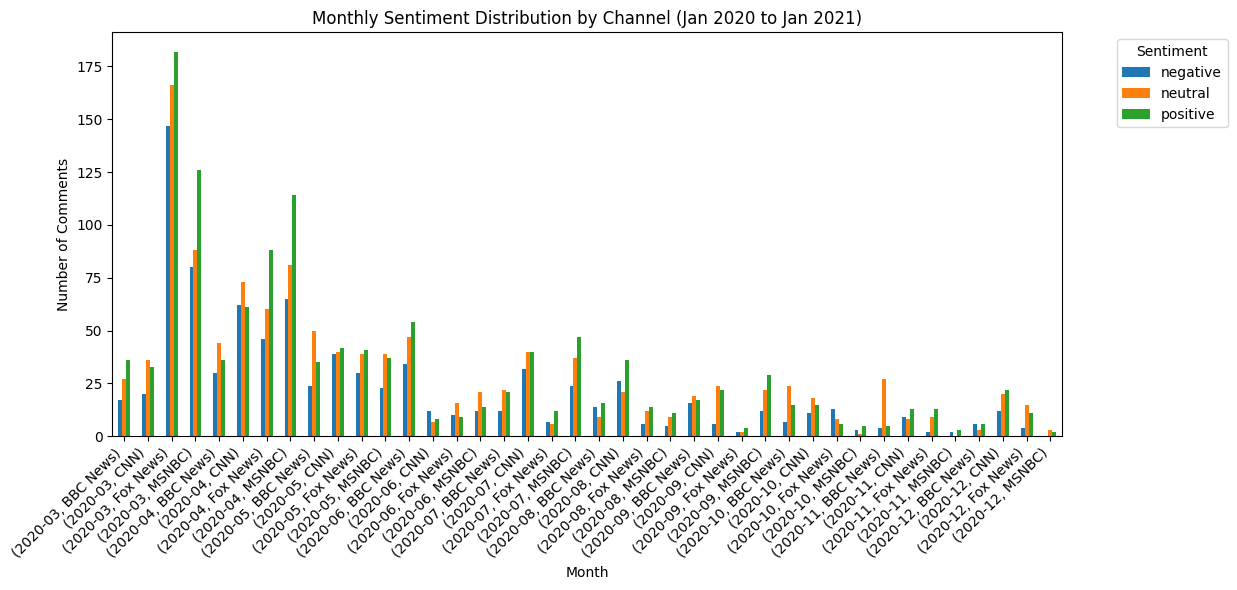

In [58]:
# Create the template
plt.figure(figsize=(12, 6))
# Make sure that 
sentimentcounts.plot(kind='bar', stacked=False, figsize=(12, 6))

# Create the title, labels, legent, and the layout type.
plt.title('Monthly Sentiment Distribution by Channel (Jan 2020 to Jan 2021)')
plt.xlabel('Month')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

#!Rotate and re-allign the labels (they were overlapping before) I had an issue with this
plt.xticks(rotation=45, ha='right')  

plt.show()

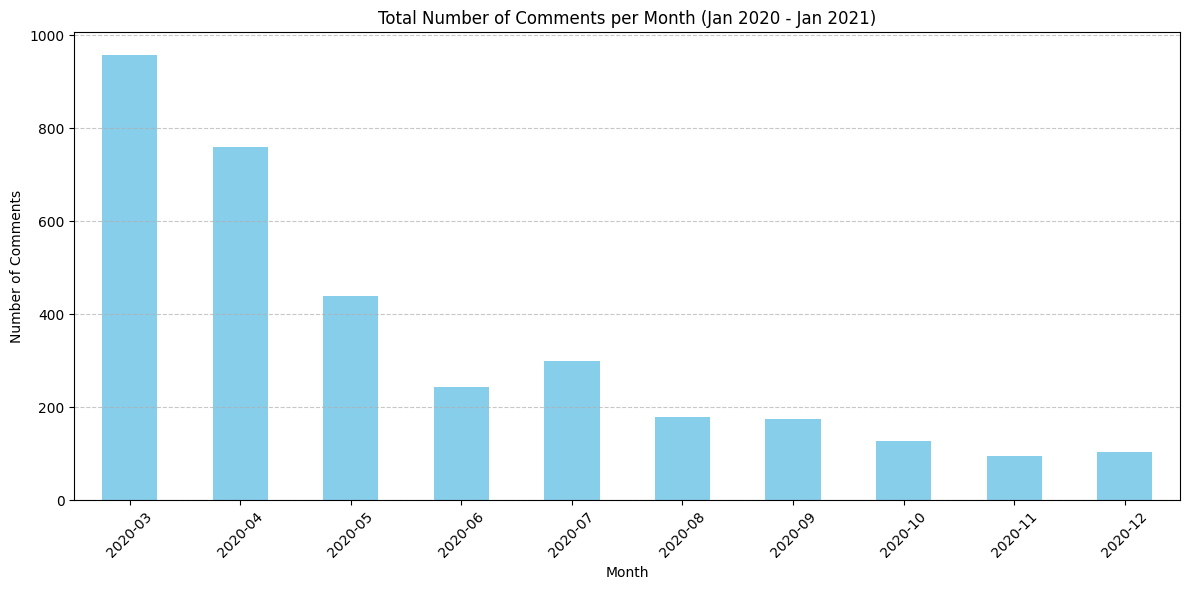

In [49]:
# Group by month and count the number of comments
comments_per_month = filtereddf.groupby('month').size()

# Set up the graph.
plt.figure(figsize=(12, 6))
comments_per_month.plot(kind='bar', color='skyblue')
plt.title('Total Number of Comments per Month (Jan 2020 - Jan 2021)')
plt.xlabel('Month')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
#Print the graph.
plt.show()

In [50]:
# Verify comment counts for December 2020
december_comments = mergeddf[mergeddf['month'] == '2020-12']
print(december_comments.shape[0])


104


This was done to validate the data for personal use. You can ignore this but ill leave it in incase.

Across multiple analyses, coverage of COVID‑19 dominated the news agenda in the first half of 2020—peaking in March and remaining exceptionally high through mid‑year—before declining steadily into late 2020, even as case numbers continued to rise.

Peak Coverage in Early 2020

March 2020: 80% of all news items were about COVID‑19, driven by the declaration of a global pandemic and first lockdowns. 
Consumers Health Forum of Australia
March 4–12, 2020 saw intense focus across print, broadcast and social media—this window was chosen precisely because it represented the initial flurry of pandemic reporting.
Cambridge University Press & Assessment
A Reuters Institute survey in April 2020 found that people were accessing COVID‑19 news more than any other topic, with trust in news about the virus higher than in governments or social platforms.
Reuters Institute Digital News Report
Sustained, Unprecedented Mid‑Year Coverage

Even at its low point in late June 2020, COVID‑19 still accounted for 24.6% of all news coverage—the “lowest” share since the spring peak. 
SpringerLink
Between May and September 2020, weekly shares never dropped below a quarter of all reporting, an “unprecedented” level compared to any other topic. 
SpringerLink
Although online and TV news use dipped after April (e.g., online news down 17 percentage points by August 2020), overall coverage remained high through mid‑year. 
Reuters Institute
A University of Canberra study logged 2.5 million distinct news items on COVID‑19 from January–November 2020, underlining the sheer volume of mid‑year reporting. 
University of Canberra Research Portal
Homepage
Decline in Late 2020

By late 2020, surveys and content‑analysis studies noted a steady decline in COVID‑19 news share compared to the spring: “media coverage of the pandemic has decreased since the initial flurry of attention…in early 2020.” 
The Lancet
A global newspaper study charting weekly coverage from Dec 30, 2019–Nov 1, 2020 shows a clear peak in March–April followed by a downward trajectory into autumn. 
The Lancet
Even on social media, early‑pandemic articles (about 1% of output in mid‑March) captured 13% of all views, indicating intense but front‑loaded engagement—later in the year, overall social chatter about COVID‑19 had normalized alongside other topics. 
Wikipedia

##### E.2. Use regression analysis with visualization to test the following hypothesises:

* H1: There is a meaningful relationship between the sentiment of a video title and the sentiments of its corresponding comments.  
* H2: There is a meaningful relationship between the video likes and the sentiments of its corresponding comments.
* H3: There is a meaningful relationship between the duration of a video and the sentiments of its corresponding comments.

In [51]:
# load the data

# apply the get_sentiment_score and get_sentiment functions to the video titles to get the sentiment scores and sentiment categories respectively

# apply the get_sentiment_score and get_sentiment functions to the comments to get the sentiment scores and sentiment categories respectively

# create subplots for each plot

# group the comments by video and calculate the average sentiment score of comments and sentiment score for each video title
# plot the first subplot

# group the comments by video and calculate the average sentiment score and number of likes for each video
# plot the second subplot

# group the comments by video and calculate the average sentiment score and duration for each video
# plot the third subplot

# ...


##### E.3. Check if the following hypothesis is true: Video titles that contain certain words are more likely to elicit certain sentiments in the comments. Use visualization and discuss your observations. Use function get_sentiment_score().

Approach: Use natural language processing (NLP) techniques to clean the video titles and count the occurrence of words in them. Group the video titles by their associated sentiment categories (positive, negative, neautral) and filter out words that are frequent across all sentiment categories. You can visualize the relationship between sentiment and word prevalence by creating word clouds for each sentiment category.


In [52]:
# This question is slightly more challenging than E.1 and E.2 (please note you are required to asnwer only one of the questions)
